In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

%matplotlib inline

定数 λ > 0 に対し、自然数を値にとる確率変数 X が

$$
P(X=k)={\frac  {\lambda ^{k}e^{{-\lambda }}}{k!}}
$$

を満たすとき、確率変数 X はパラメータ λ のポアソン分布に従うという。

(https://ja.wikipedia.org/wiki/%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%88%86%E5%B8%83 より)

(注記)

wikipediaだと、自然数に対する確率変数となっているが、k!でk=0の場合は1となるので、正の整数で良さそう。

In [2]:
# 書いてみる

data_size = 20
lamb = 0.35

x = np.arange(data_size)
p = np.empty(data_size)
for k in range(len(x)):
    p[k] = (lamb ** x[k]) * np.exp(-lamb) / math.factorial(x[k])

In [3]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [4]:
p

array([7.04688090e-01, 2.46640831e-01, 4.31621455e-02, 5.03558364e-03,
       4.40613569e-04, 3.08429498e-05, 1.79917207e-06, 8.99586036e-08,
       3.93568891e-09, 1.53054569e-10, 5.35690990e-12, 1.70447133e-13,
       4.97137472e-15, 1.33844704e-16, 3.34611760e-18, 7.80760773e-20,
       1.70791419e-21, 3.51629392e-23, 6.83723818e-25, 1.25949124e-26])

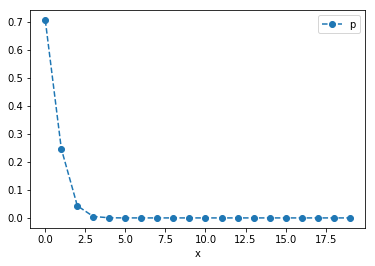

In [5]:
df = pd.DataFrame({
    'x': x,
    'p': p,
})
df.plot(x='x', y='p', style='o--')

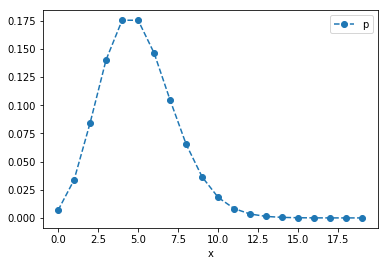

In [6]:
# パラメータ変更
data_size = 20
lamb = 5.0

x = np.arange(data_size)
p = np.empty(data_size)
for k in range(len(x)):
    p[k] = (lamb ** x[k]) * np.exp(-lamb) / math.factorial(x[k])
    
df = pd.DataFrame({
    'x': x,
    'p': p,
})
df.plot(x='x', y='p', style='o--')

In [7]:
# ポアソン分布の特徴
# xとpで構成される確率変数Xの期待値がλ
print('λ:{}, Xの期待値:{}'.format(lamb, np.sum(x*p)))
# xとpで構成される確率変数Xの分散値がλ(V(X) = E(X^2) - (E(X))^2 を利用)
print('λ:{}, Xの分散値:{}'.format(lamb, np.sum(x**2 * p) - lamb**2))
# 確率分布の合計が1
print('sum of p:{}'.format(np.sum(p)))

λ:5.0, Xの期待値:4.999992991510539
λ:5.0, Xの分散値:4.999857583053792
sum of p:0.9999996547864181


## ポアソン分布の利用方法

* プロシア陸軍において馬に蹴られて死んだ兵士数
* 交通事故件数
* 大量生産の不良品数
* 破産件数
* 火災件数
* 砲弾命中数
* 遺伝子の突然変異数
* 電話の呼び数
* 渋滞していない高速道路の料金ゲートへの車の到着数

(東京大学出版会 統計学入門より)

λのみにより分布が求められる。λは与えられたデータセットの平均をセットする。

# 例
## 年間50件交通事故が発生している市で、1日あたり交通事故が2件以上発生する確率

In [8]:
from scipy.stats import poisson

accident_per_day = 50 / 365
poisson_arr = np.random.poisson(lam=accident_per_day, size=10000)
max_val = np.max(poisson_arr)

# ポワソン分布に従った確率変数を取得
x_range = np.arange(max_val + 1)
poisson_prob = poisson.pmf(x_range, mu=accident_per_day)

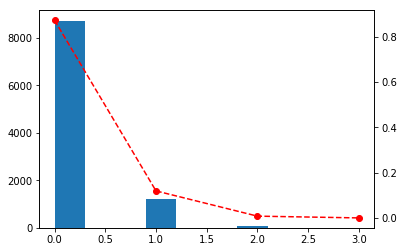

In [9]:
fig, ax1 = plt.subplots()
ax1.hist(x=poisson_arr, align='mid', bins=10)
ax2 = ax1.twinx()
ax2.plot(x_range, poisson_prob, 'ro--')
plt.show()
# 2軸になったことでy軸の原点がずれているが、おおむね傾向は問題なさそう

In [10]:
# ランダムで発生したpoisson分布から求めた2件/1日以上の交通事故が発生する可能性
arr_over_2 = np.sum(poisson_arr > 1) / 10000
print('1日2件以上の交通事故発生確率: {}'.format(arr_over_2))
 
# poisson分布に従った確率分布から求めた2件/1日以上の交通事故が発生する可能性
prob_over_2 = np.sum(poisson_prob[2:])
print('1日2件以上の交通事故発生確率: {}'.format(prob_over_2))

1日2件以上の交通事故発生確率: 0.0086
1日2件以上の交通事故発生確率: 0.008555063881597425
